<a href="https://colab.research.google.com/github/nkaduk/Artificial-Intelligence/blob/main/AI_Final_Project_Sudoku_by_Bhanu_and_Nate_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Artificial intelligence - Final code


#**AI to Slove Simple Sudoku**
        
##### M.S. in Artificial intelligence
##### Submission details  - 12/03/2023
     Group#7 Member's
*   Giddaluru Bhanu Teja - 811258615 - bgiddalu@kent.edu
*   Nathaniel Kaduk      - 911116698 - nkaduk@kent.edu


    


# Introduction

In this project we are going to solve the sudoku puzzel

# Dataset information

Kaggle: Sudoku Box Detection
[link text](https://www.kaggle.com/datasets/macfooty/sudoku-box-detection)
* Augmented - Sudoku dataset images.
* 2620 JPEG-Type Images
* 600 x 600 shape


Kaggle: Digits
[link text](https://www.kaggle.com/datasets/karnikakapoor/digits)

* Digits from the Chars74K image dataset
* It contains digits from 0 to 9
* 1016 PNG-type images for each digit
* 128 X 128 shape


# mount drive

In [ ]:
import os

from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/Ai_Sudoku

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Ai_Sudoku


In [ ]:
pwd

'/content/drive/MyDrive/Ai_Sudoku'

In [ ]:
# required libraries
!pip install numpy pandas seaborn matplotlib opencv-python scikit-learn tensorflow keras pillow


# Libraries

In [ ]:
# Importing the numpy library, commonly used for numerical operations, as the alias 'np' for convenience.
import numpy as np

# Importing the pandas library, used for data manipulation and analysis, as the alias 'pd'.
import pandas as pd

# Importing the seaborn library, a statistical data visualization library based on matplotlib, as 'sns'.
import seaborn as sns

# Importing the pyplot interface from matplotlib library to create figures and graphs, as 'plt'.
import matplotlib.pyplot as plt

# Importing the os module for operating system dependent functionality and 'random' for generating random numbers.
import os, random

# Importing the cv2 library from OpenCV for computer vision tasks such as image processing.
import cv2

# Importing 'glob' which is used to retrieve files/pathnames matching a specified pattern.
from glob import glob

# Importing sklearn for machine learning and statistical modeling including classification, regression, clustering, and dimensionality reduction.
import sklearn

# From sklearn's model_selection module, importing train_test_split function to split a dataset into random train and test subsets.
from sklearn.model_selection import train_test_split

# Importing the tensorflow library for machine learning and neural network functionality, as 'tf'.
import tensorflow as tf

# Importing the keras API from tensorflow for building and training deep learning models, as 'keras'.
from tensorflow import keras

# Importing ImageDataGenerator from keras.preprocessing.image to augment and process image data before training models.
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Importing 'load_img' for loading images and 'ImageDataGenerator' for data augmentation, both from keras.preprocessing.image.
from keras.preprocessing.image import ImageDataGenerator, load_img

# Importing 'to_categorical' from tensorflow.keras.utils to convert class vectors to binary class matrices.
from tensorflow.keras.utils import to_categorical

# Importing 'Sequential' from tensorflow.keras.models to create a linear stack of neural network layers.
from tensorflow.keras.models import Sequential

# Importing various neural network layers and utilities from tensorflow.keras.layers.
from tensorflow.keras.layers import Activation, Dropout, Dense, Flatten, BatchNormalization, Conv2D, MaxPooling2D

# Importing 'RMSprop' optimizer from tensorflow.keras.optimizers.
from tensorflow.keras.optimizers import RMSprop

# Importing 'backend' from tensorflow.keras to interact with backend-specific functionalities.
from tensorflow.keras import backend as K

# Importing 'image' module from tensorflow.keras.preprocessing for image data augmentation and processing.
from tensorflow.keras.preprocessing import image

# Importing 'accuracy_score' and 'classification_report' from sklearn.metrics for model evaluation.
from sklearn.metrics import accuracy_score, classification_report

# Importing 'Path' from pathlib for object-oriented filesystem paths.
from pathlib import Path

# Importing 'Image' from PIL (Python Imaging Library) to open, manipulate, and save many different image file formats.
from PIL import Image


In [ ]:
pwd

'/content/drive/MyDrive/Ai_Sudoku'

# Digit dataset information

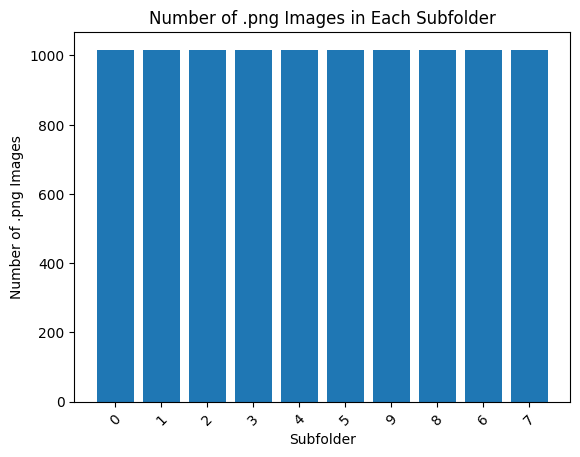

In [ ]:
import os
import matplotlib.pyplot as plt

def Total_Png_images(folder_pt):
    """
    Count the number of .png images in each subfolder of the given folder_path.

    :param folder_pt: Path to the main folder_path.
    :return: Dictionary with subfolder names as keys and counts of .png images as values.
    """
    counts = {}
    for root, dirs, files in os.walk(folder_pt):
        for dir in dirs:
            dir_pt = os.path.join(root, dir)
            count = sum(1 for f in os.listdir(dir_pt) if f.endswith('.png'))
            counts[dir] = count
    return counts

def plot_png_counts(counts):
    """
    Plot a bar chart of the number of .png images in each subfolder.

    :param counts: Dictionary with subfolder names and counts of .png images.
    """
    plt.bar(counts.keys(), counts.values())
    plt.xlabel('Subfolder')
    plt.ylabel('Number of .png Images')
    plt.title('Number of .png Images in Each Subfolder')
    plt.xticks(rotation=45)
    plt.show()

# Replace 'your_main_folder_path' with the path to your main folder_path
folder_pt = '/content/drive/MyDrive/Ai_Sudoku/Digits'
counts = Total_Png_images(folder_pt)
plot_png_counts(counts)


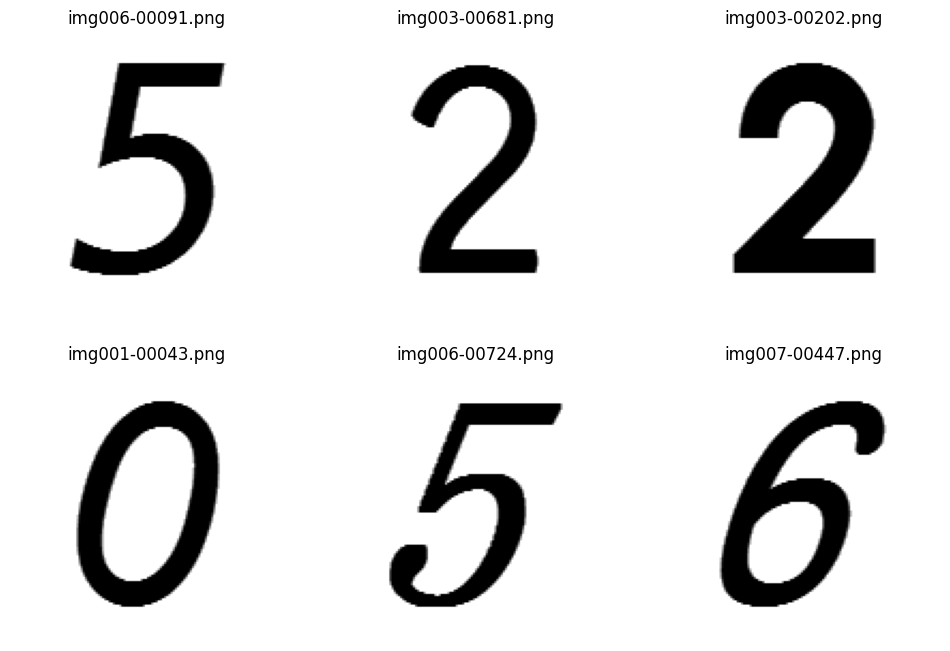

In [ ]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def find_and_display_random_images(folder_pt, number=6):
    """
    Find .png images in all subfolders and display a specified number of them randomly.

    :param folder_pt: Path to the main folder_path.
    :param number: Number of images to display.
    """
    png_files = []
    for root, dirs, files in os.walk(folder_pt):
        for file in files:
            if file.endswith('.png'):
                png_files.append(os.path.join(root, file))

    selected_images = random.sample(png_files, min(len(png_files), number))

    plt.figure(figsize=(12, 8))  # Adjust figure size as needed
    for i, img_path in enumerate(selected_images):
        neural_img = mpimg.imread(img_path)
        plt.subplot(2, 3, i+1)  # Adjust subplot grid if needed

        if neural_img.ndim == 2:
            # Grayscale image
            plt.imshow(neural_img, cmap='gray')
        elif neural_img.shape[2] == 4:
            # RGBA image, ignore alpha channel
            plt.imshow(neural_img[:, :, :3])
        else:
            plt.imshow(neural_img)

        plt.axis('off')
        plt.title(os.path.basename(img_path))

    plt.show()

# Replace with the path to your main folder_path
folder_pt = '/content/drive/MyDrive/Ai_Sudoku/Digits'
find_and_display_random_images(folder_pt)


# sudoku dataset information

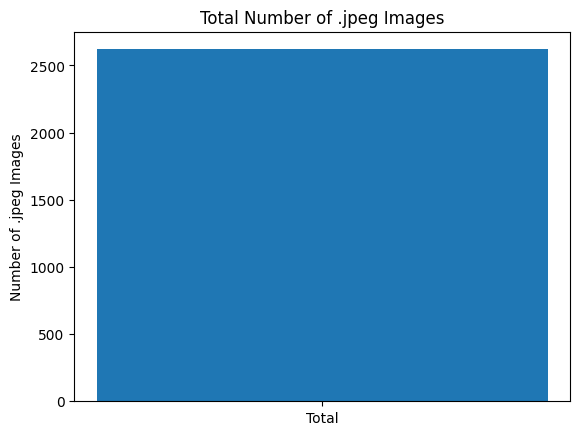

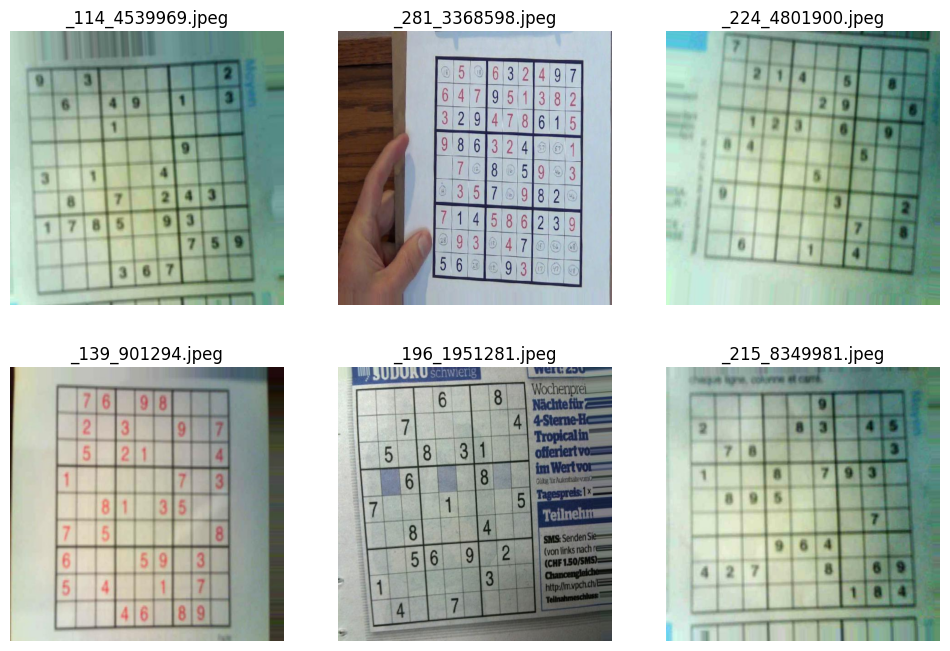

In [ ]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def count_jpeg_images(folder_pt):
    """
    Count the number of .jpeg images in the given folder_path.

    :param folder_pt: Path to the folder_path.
    :return: Total count of .jpeg images.
    """
    count = sum(1 for f in os.listdir(folder_pt) if f.endswith('.jpeg'))
    return count

def plot_jpeg_count(count):
    """
    Plot a bar chart showing the total number of .jpeg images.

    :param count: Total count of .jpeg images.
    """
    plt.bar(['Total'], [count])
    plt.ylabel('Number of .jpeg Images')
    plt.title('Total Number of .jpeg Images')
    plt.show()

def display_random_images(folder_pt, number=6):
    """
    Display a specified number of random .jpeg images from the folder_path.

    :param folder_pt: Path to the folder_path.
    :param number: Number of images to display.
    """
    jpeg_files = [os.path.join(folder_pt, f) for f in os.listdir(folder_pt) if f.endswith('.jpeg')]
    selected_images = random.sample(jpeg_files, min(len(jpeg_files), number))

    plt.figure(figsize=(12, 8))  # Adjust figure size as needed
    for i, img_path in enumerate(selected_images):
        neural_img = mpimg.imread(img_path)
        plt.subplot(2, 3, i+1)  # Adjust subplot grid if needed
        plt.imshow(neural_img)
        plt.axis('off')
        plt.title(os.path.basename(img_path))

    plt.show()

# Replace with the path to your main folder_path
folder_pt = '/content/drive/MyDrive/Ai_Sudoku/aug'
total_jpegs = count_jpeg_images(folder_pt)
plot_jpeg_count(total_jpegs)
display_random_images(folder_pt)


# loading the digit dataset

In [ ]:
# Loading the data
import os

# List all the subdirectories (each representing a class) in the "Digits" directory.
data = os.listdir(r"Digits")

# Lists to store image data (X) and corresponding labels (y).
image_data_X = []
Ladel_data_y = []

# Get the number of classes (i.e., number of subdirectories in the "Digits" directory).
total_class = len(data)

# Loop through each class directory to read and process images.
for i in range(0, total_class):
    # List all image files in the current class directory.
    data_list = os.listdir(r"Digits" + "/" + str(i))

    # Loop through each image in the current class directory.
    for j in data_list:
        # Read the image using OpenCV, resize it to (32, 32) pixels.
        input_img = cv2.imread(r"Digits" + "/" + str(i) + "/" + j)
        input_img = cv2.resize(input_img, (32, 32))

        # Append the image data (X) and corresponding label (y) to the lists.
        image_data_X.append(input_img)
        Ladel_data_y.append(i)

# Check if the number of images and labels are the same.
if len(image_data_X) == len(Ladel_data_y):
    print("Total Datapoints =", len(image_data_X))

# Convert lists to numpy arrays for further processing.
image_data_X = np.array(image_data_X)
Ladel_data_y = np.array(Ladel_data_y)


Total Dataponits =  10161


In [ ]:
# Splitting the dataset into train, validation, and test sets using train_test_split from sklearn.
# The test size is set to 5%, and the training set is further split into training and validation sets with a ratio of 80:20.

# Splitting the dataset into training and test sets.
train_X, test_X, train_y, test_y = train_test_split(image_data_X, Ladel_data_y, test_size=0.05)

# Further splitting the training set into training and validation sets.
train_X, valid_X, train_y, valid_y = train_test_split(train_X, train_y, test_size=0.2)

# Displaying the shapes of the resulting sets.
print("Training Set Shape =", train_X.shape)
print("Validation Set Shape =", valid_X.shape)
print("Test Set Shape =", test_X.shape)


Training Set Shape =  (7721, 32, 32, 3)
Validation Set Shape =  (1931, 32, 32, 3)
Test Set Shape =  (509, 32, 32, 3)


In [ ]:
# Preprocessing the images for neural network training

# Define a function to preprocess individual images
def Prep(neural_img):
    # Convert the image to grayscale
    neural_img = cv2.cvtColor(neural_img, cv2.COLOR_BGR2GRAY)

    # Perform histogram equalization to enhance contrast
    neural_img = cv2.equalizeHist(neural_img)

    # Normalize the pixel values to the range [0, 1]
    neural_img = neural_img / 255.0

    return neural_img

# Apply the preprocessing function to all images in the training, validation, and test sets
train_X = np.array(list(map(Prep, train_X)))
test_X = np.array(list(map(Prep, test_X)))
valid_X = np.array(list(map(Prep, valid_X)))

# Reshape the images to add a single channel (for grayscale) dimension
train_X = train_X.reshape(train_X.shape[0], train_X.shape[1], train_X.shape[2],1)
test_X = test_X.reshape(test_X.shape[0], test_X.shape[1], test_X.shape[2],1)
valid_X = valid_X.reshape(valid_X.shape[0], valid_X.shape[1], valid_X.shape[2],1)

# Data augmentation using ImageDataGenerator
dataAug = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, zoom_range=0.2, shear_range=0.1, rotation_range=10)


# Fit the data generator on the training set
dataAug.fit(train_X)


In [ ]:
# One-hot encoding of the labels using to_categorical from tensorflow.keras.utils

# Convert training labels to one-hot encoding
train_y = to_categorical(train_y, total_class)

# Convert test labels to one-hot encoding
test_y = to_categorical(test_y, total_class)

# Convert validation labels to one-hot encoding
valid_y = to_categorical(valid_y, total_class)


# CNN model for digit dataset

In [ ]:
# Creating a Convolutional Neural Network (CNN) using Sequential model from tensorflow.keras

# Initialize the Sequential model
model = Sequential()

# Add the first convolutional layer with 60 filters, a kernel size of (5, 5), input shape of (32, 32, 1),
# 'same' padding, and ReLU activation function
model.add(Conv2D(60, (5, 5), input_shape=(32, 32, 1), padding='same', activation='relu'))

# Add the second convolutional layer with 60 filters, a kernel size of (5, 5),
# 'same' padding, and ReLU activation function
model.add(Conv2D(60, (5, 5), padding='same', activation='relu'))

# Add a max pooling layer with a pool size of (2, 2)
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add the third convolutional layer with 30 filters, a kernel size of (3, 3),
# 'same' padding, and ReLU activation function
model.add(Conv2D(30, (3, 3), padding='same', activation='relu'))

# Add the fourth convolutional layer with 30 filters, a kernel size of (3, 3),
# 'same' padding, and ReLU activation function
model.add(Conv2D(30, (3, 3), padding='same', activation='relu'))

# Add a max pooling layer with a pool size of (2, 2) and strides of (2, 2)
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# Add a dropout layer with a dropout rate of 0.5
model.add(Dropout(0.5))

# Flatten the output before feeding into fully connected layers
model.add(Flatten())

# Add a fully connected layer with 500 neurons and ReLU activation function
model.add(Dense(500, activation='relu'))

# Add a dropout layer with a dropout rate of 0.5
model.add(Dropout(0.5))

# Add the output layer with 10 neurons (for 10 classes) and softmax activation function
model.add(Dense(10, activation='softmax'))

# Display the model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 60)        1560      
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 60)        90060     
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 60)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 30)        16230     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 30)        8130      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 8, 8, 30)          0         
 g2D)                                                   

In [ ]:
# Compiling the model
from tensorflow.keras.optimizers import RMSprop

# Define the RMSprop optimizer with specific parameters
optimizer = RMSprop(learning_rate=0.001, rho=0.9, epsilon=1e-08)

# Compile the model with the specified optimizer, categorical crossentropy loss, and accuracy as the metric
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])


# Fit the model
# Using data augmentation with ImageDataGenerator to generate augmented training data
# 'dataAug.flow' generates batches of augmented data and labels indefinitely
# 'batch_size' specifies the number of samples processed in each iteration
# 'epochs' is the number of training iterations
# 'validation_data' is the data used for validation during training
# 'verbose' controls the amount of information displayed during training (2 for more information)
# 'steps_per_epoch' is the number of batches to be processed for each epoch
history = model.fit(dataAug.flow(train_X, train_y, batch_size=32),
                    epochs=30, validation_data=(valid_X, valid_y),
                    verbose=2, steps_per_epoch=200)


Epoch 1/30
200/200 - 119s - loss: 0.9547 - accuracy: 0.6723 - val_loss: 0.1342 - val_accuracy: 0.9581 - 119s/epoch - 597ms/step
Epoch 2/30
200/200 - 117s - loss: 0.2912 - accuracy: 0.9053 - val_loss: 0.0478 - val_accuracy: 0.9865 - 117s/epoch - 584ms/step
Epoch 3/30
200/200 - 113s - loss: 0.1992 - accuracy: 0.9373 - val_loss: 0.0469 - val_accuracy: 0.9860 - 113s/epoch - 566ms/step
Epoch 4/30
200/200 - 114s - loss: 0.1700 - accuracy: 0.9484 - val_loss: 0.0507 - val_accuracy: 0.9871 - 114s/epoch - 570ms/step
Epoch 5/30
200/200 - 111s - loss: 0.1446 - accuracy: 0.9552 - val_loss: 0.0756 - val_accuracy: 0.9762 - 111s/epoch - 554ms/step
Epoch 6/30
200/200 - 113s - loss: 0.1289 - accuracy: 0.9610 - val_loss: 0.0333 - val_accuracy: 0.9907 - 113s/epoch - 567ms/step
Epoch 7/30
200/200 - 110s - loss: 0.1084 - accuracy: 0.9669 - val_loss: 0.0328 - val_accuracy: 0.9927 - 110s/epoch - 551ms/step
Epoch 8/30
200/200 - 113s - loss: 0.1056 - accuracy: 0.9657 - val_loss: 0.0364 - val_accuracy: 0.9886 - 

# digit classification model results

In [ ]:
# Testing the model on the test set

score = model.evaluate(test_X, test_y, verbose=0)
print('Test Score = ',score[0])
print('Test Accuracy =', score[1])

Test Score =  0.007772237993776798
Test Accuracy = 0.9980353713035583


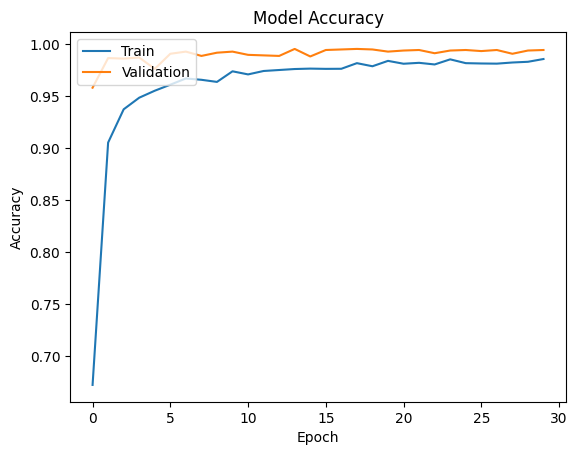

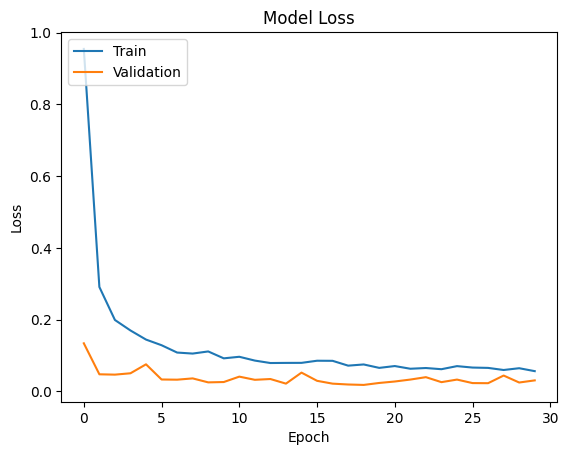

In [ ]:
import matplotlib.pyplot as plt

# Summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [ ]:
from tensorflow.keras.utils import to_categorical

# Predict the values from the test dataset
test_y_pred = model.predict(test_X)

# Convert predictions classes to one-hot vectors
test_y_pred_classes = np.argmax(test_y_pred, axis=1)

# Convert true labels (ground truth) to one-hot vectors
test_y_true = np.argmax(test_y, axis=1)



16/16 [==============================] - 4s 234ms/step


In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np

# Compute the confusion matrix
conf_matrix = confusion_matrix(test_y_true, test_y_pred_classes)


In [ ]:
print(conf_matrix)


[[52  0  0  0  0  0  0  0  0  0]
 [ 0 46  0  0  1  0  0  0  0  0]
 [ 0  0 54  0  0  0  0  0  0  0]
 [ 0  0  0 47  0  0  0  0  0  0]
 [ 0  0  0  0 59  0  0  0  0  0]
 [ 0  0  0  0  0 47  0  0  0  0]
 [ 0  0  0  0  0  0 53  0  0  0]
 [ 0  0  0  0  0  0  0 56  0  0]
 [ 0  0  0  0  0  0  0  0 40  0]
 [ 0  0  0  0  0  0  0  0  0 54]]


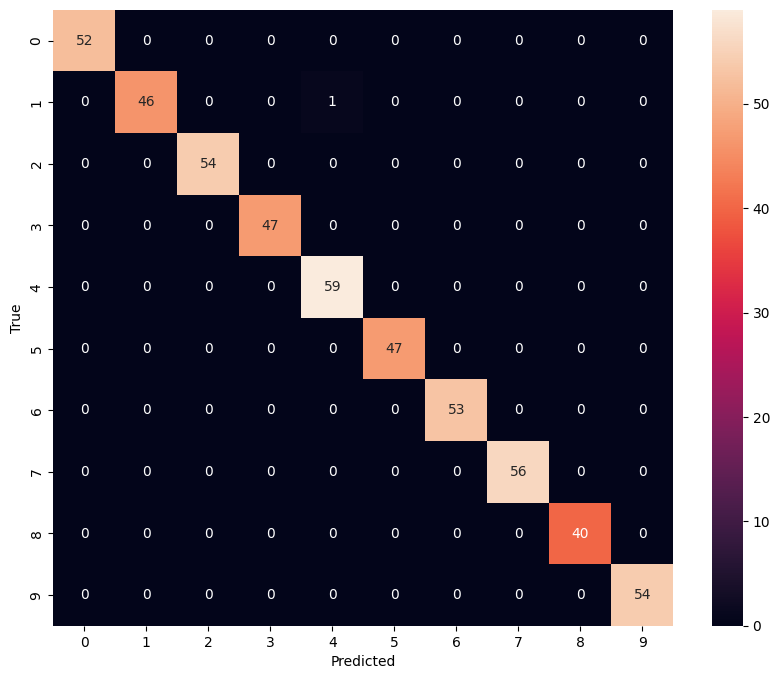

In [ ]:
import seaborn as sns

# Plotting the confusion matrix using seaborn
plt.figure(figsize=(10,8))
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [ ]:
from sklearn.metrics import classification_report

# Calculate and print the classification report

# Using the 'classification_report' function from sklearn.metrics to generate a detailed text report
# This report includes precision, recall, and F1-score for each class, as well as overall performance metrics.
# It is based on the comparison between the true class labels (test_y_true) and the predicted class labels (test_y_pred_classes).

class_report = classification_report(test_y_true, test_y_pred_classes)

# Print the generated classification report to the console for evaluation and analysis.
print(class_report)



              precision    recall  f1-score   support

           0       1.00      1.00      1.00        52
           1       1.00      0.98      0.99        47
           2       1.00      1.00      1.00        54
           3       1.00      1.00      1.00        47
           4       0.98      1.00      0.99        59
           5       1.00      1.00      1.00        47
           6       1.00      1.00      1.00        53
           7       1.00      1.00      1.00        56
           8       1.00      1.00      1.00        40
           9       1.00      1.00      1.00        54

    accuracy                           1.00       509
   macro avg       1.00      1.00      1.00       509
weighted avg       1.00      1.00      1.00       509



# suduko box detection

# test

_74_1430492.jpeg


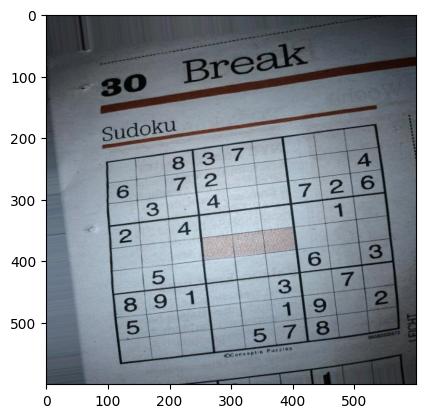

In [ ]:
# Randomly select an image from the dataset

# Specify the folder_path containing the images
folder_path = r"aug"

# Randomly select an image file from the specified folder_path
a=random.choice(os.listdir(folder_path))

# Print the selected image file name
print(a)

# Read and display the selected image using OpenCV
input_sudoku = cv2.imread(folder_path+'/'+a)
plt.figure()
plt.imshow(input_sudoku)
plt.show()

# preprocessing the image

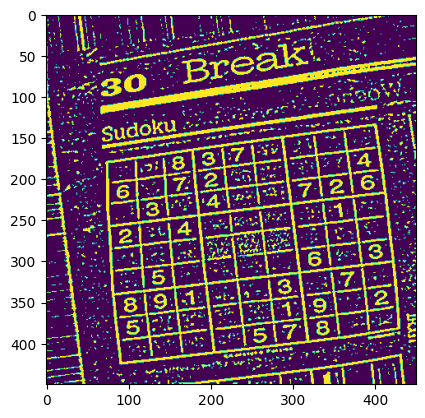

In [ ]:
# Preprocessing image to be read

# Resize the image to a specified size (450x450)
input_sudoku = cv2.resize(input_sudoku, (450, 450))

# Function to preprocess the image by converting it to grayscale, applying Gaussian blur,
# and changing the adaptive threshold for better readability
def preprocess(image):
    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian blur to reduce noise and improve thresholding
    blur = cv2.GaussianBlur(gray, (3, 3), 6)

    # Apply adaptive thresholding to create a binary image
    pre_img = cv2.adaptiveThreshold(blur, 255, 1, 1, 11, 2)

    return pre_img

# Preprocess the randomly selected image
threshold = preprocess(input_sudoku)

# Display the preprocessed image
plt.figure()
plt.imshow(threshold)
plt.show()


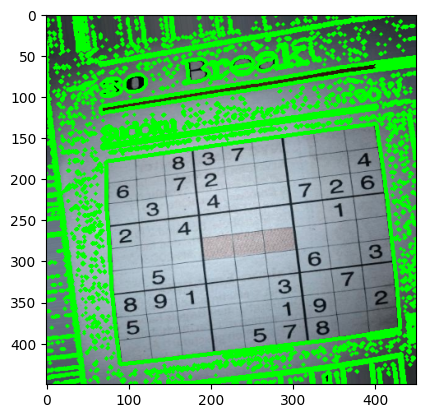

In [ ]:
# Finding the outline of the sudoku puzzle in the image

# Create copies of the original image for visualization
contour_1 = input_sudoku.copy()  # Copy of the original image for drawing contours
contour_2 = input_sudoku.copy()  # Additional copy, which might be used later for other visualizations or processing

# Find contours in the preprocessed image using cv2.findContours
contour, hierarchy = cv2.findContours(threshold, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
# cv2.RETR_EXTERNAL retrieves only the external boundary of the Sudoku puzzle
# cv2.CHAIN_APPROX_SIMPLE compresses the contour, storing only the endpoints of the segments


# Draw the contours on the first copy of the image
cv2.drawContours(contour_1, contour, -1, (0, 255, 0), 3)
# cv2.drawContours is used to draw the contours on the image. Here, it's drawing on the 'contour_1' image copy
# The third parameter '-1' signifies that all contours should be drawn
# (0, 255, 0) is the color green, and '3' is the line thickness for drawing the contours

# Display the image with drawn contours
plt.figure()
plt.imshow(contour_1)
plt.show()


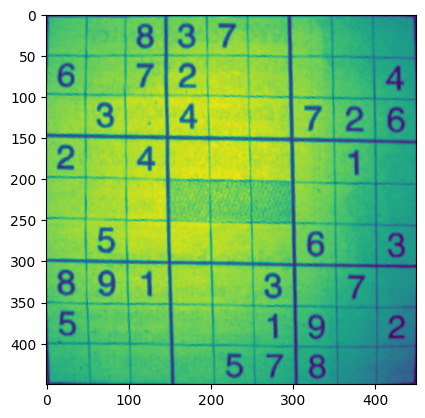

In [ ]:
# Function to find the main outline of the sudoku puzzle
def main_box(contour):
    # Initialize variables to store the largest contour and its area
    biggest = np.array([])
    max_area = 0

    # Iterate through each contour found in the image
    for i in contour:
        # Compute the area of the current contour
        area = cv2.contourArea(i)

        # Only consider contours with an area greater than 50 to filter out noise
        if area > 50:
            # Calculate the perimeter of the contour
            peri = cv2.arcLength(i, True)
            # Approximate the contour shape to a polygon; 0.02 * peri is the approximation accuracy
            approx = cv2.approxPolyDP(i, 0.02 * peri, True)

            # Check if the contour is quadrilateral (4 sides) and has the largest area found so far
            if area > max_area and len(approx) == 4:
                biggest = approx  # Update the biggest contour
                max_area = area   # Update the largest area

    return biggest, max_area  # Return the largest quadrilateral contour and its area

# Function to reframe the points of the polygon
def reframe(points):
    # Reshape points to a 2D array for easier manipulation
    points = points.reshape((4, 2))

    # Initialize a new array to store the rearranged points
    points_new = np.zeros((4, 1, 2), dtype=np.int32)

    # Sum and difference calculations to determine the ordering of the points
    add = points.sum(1)
    diff = np.diff(points, axis=1)

    # Assign the top-left, bottom-right, top-right, and bottom-left points based on sums and differences
    points_new[0] = points[np.argmin(add)]
    points_new[3] = points[np.argmax(add)]
    points_new[1] = points[np.argmin(diff)]
    points_new[2] = points[np.argmax(diff)]

    return points_new  # Return the rearranged points

# Function to split the image into individual cells
def splitcells(neural_img):
    # Split the image into 9 equal rows
    rows = np.vsplit(neural_img, 9)
    boxes = []

    # Split each row into 9 cells, resulting in 81 cells (9x9 Sudoku grid)
    for r in rows:
        cols = np.hsplit(r, 9)
        for box in cols:
            boxes.append(box)
    return boxes  # Return the list of 81 cells

# Create a black image for visualization
black_img = np.zeros((450, 450, 3), np.uint8)

# Find the main outline of the sudoku puzzle
biggest, maxArea = main_box(contour)

# Check if a valid outline is found (biggest array is not empty)
if biggest.size != 0:
    # Reframe the points of the polygon to reorder the points
    biggest = reframe(biggest)

    # Draw the contours of the main outline on a copy of the original image (contour_2)
    cv2.drawContours(contour_2, biggest, -1, (0, 255, 0), 10)

    # Define the transformation matrix for perspective correction
    pts1 = np.float32(biggest)
    pts2 = np.float32([[0, 0], [450, 0], [0, 450], [450, 450]])
    matrix = cv2.getPerspectiveTransform(pts1, pts2)

    # Apply perspective correction to the sudoku puzzle image
    imagewrap = cv2.warpPerspective(input_sudoku, matrix, (450, 450))

    # Convert the perspective-corrected image to grayscale
    imagewrap = cv2.cvtColor(imagewrap, cv2.COLOR_BGR2GRAY)

# Display the perspective-corrected image
plt.figure()
plt.imshow(imagewrap)
plt.show()

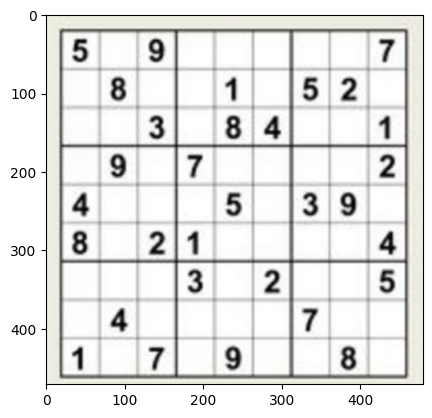

In [ ]:
# Importing puzzle to be solved
puzzle = cv2.imread("test.jpg")

# Display the imported puzzle image
plt.figure()
plt.imshow(puzzle)
plt.show()

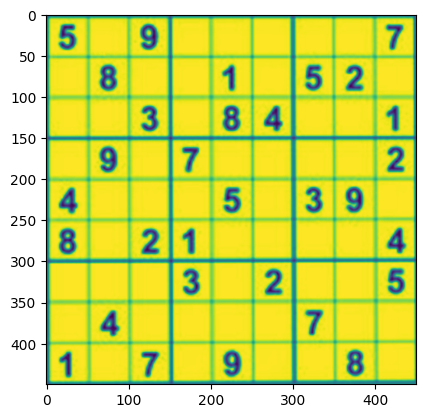

In [ ]:
# Resizing puzzle to be solved
puzzle = cv2.resize(puzzle, (450, 450))

# Preprocessing Puzzle
su_puzzle = preprocess(puzzle)

# Finding the outline of the sudoku puzzle in the image
su_contour_1 = su_puzzle.copy()
su_contour_2 = puzzle.copy()
su_contour, hierarchy = cv2.findContours(su_puzzle, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(su_contour_1, su_contour, -1, (0, 255, 0), 3)

# Create a black image for visualization
black_img = np.zeros((450, 450, 3), np.uint8)

# Find the main outline of the sudoku puzzle
su_biggest, su_maxArea = main_box(su_contour)

# Check if a valid outline is found
if su_biggest.size != 0:
    # Reframe the points of the polygon
    su_biggest = reframe(su_biggest)

    # Draw the contours of the main outline on a copy of the original image
    cv2.drawContours(su_contour_2, su_biggest, -1, (0, 255, 0), 10)

    # Define the transformation matrix for perspective correction
    su_pts1 = np.float32(su_biggest)
    su_pts2 = np.float32([[0, 0], [450, 0], [0, 450], [450, 450]])
    su_matrix = cv2.getPerspectiveTransform(su_pts1, su_pts2)

    # Apply perspective correction to the sudoku puzzle
    su_imagewrap = cv2.warpPerspective(puzzle, su_matrix, (450, 450))

    # Convert the perspective-corrected image to grayscale
    su_imagewrap = cv2.cvtColor(su_imagewrap, cv2.COLOR_BGR2GRAY)

# Display the perspective-corrected image of the sudoku puzzle to be solved
plt.figure()
plt.imshow(su_imagewrap)
plt.show()


In [ ]:
# Split the sudoku puzzle image into individual cells
sudoku_cells = splitcells(su_imagewrap)

# # Display the last cell of the sudoku puzzle
# plt.figure()
# plt.imshow(sudoku_cells[58])
# plt.show()


In [ ]:
# Function to crop each cell in the sudoku puzzle
def CropCell(cells):
    Cells_cropped = []
    for image in cells:
        # Convert the cell image to a NumPy array
        neural_img = np.array(image)

        # Crop the cell to the specified region
        neural_img = neural_img[4:46, 6:46]

        # Convert the cropped array back to an image
        neural_img = Image.fromarray(neural_img)

        # Append the cropped image to the list
        Cells_cropped.append(neural_img)

    return Cells_cropped

# Crop each cell in the sudoku puzzle
sudoku_cells_cropped = CropCell(sudoku_cells)

# Display the last cropped cell
# plt.figure()
# plt.imshow(sudoku_cells_cropped[58])
# plt.show()


In [ ]:
import cv2
import numpy as np

def read_cells(cell, model, threshold=0.65):
    result = []  # List to store the final results (predicted digits or 0 for empty cells)
    processed_images = []  # List to store preprocessed images for model prediction

    # Iterate through each cell image in the provided list of cells
    for image in cell:
        # Convert the cell image to a NumPy array for processing
        neural_img = np.asarray(image)

        # Crop the image to remove borders which might not contain useful information
        # This focuses on the central part of the image where the digit is likely to be
        neural_img = neural_img[4:neural_img.shape[0] - 4, 4:neural_img.shape[1] - 4]

        # Resize the cropped image to 32x32 pixels, which is the expected input size for the model
        neural_img = cv2.resize(neural_img, (32, 32))

        # Normalize pixel values to the range [0, 1] to match the model's expected input format
        # This step is important because the model was trained on data in this format
        neural_img = neural_img / 255
        processed_images.append(neural_img)

    # Convert the list of processed images to a NumPy array for efficient batch processing
    processed_images = np.array(processed_images)

    # Use the model to make predictions on the batch of processed cell images
    # The model outputs a probability distribution over possible classes (digits) for each image
    predictions = model.predict(processed_images)

    # Iterate through each prediction in the predictions list
    for prediction in predictions:
        # Identify the index of the class (digit) with the highest probability
        classIndex = np.argmax(prediction)

        # Obtain the probability value of this class (how confident the model is about this prediction)
        probabilityValue = np.max(prediction)

        # Compare the probability value to the threshold to decide if the prediction is confident enough
        # If the model is sufficiently confident, append the predicted class (digit) to the result list
        # Otherwise, append 0, indicating an empty cell or an unclear prediction
        if probabilityValue > threshold:
            result.append(classIndex)
        else:
            result.append(0)

    return result

# Example usage: read_cells function with sudoku_cell_croped and model
grid = read_cells(sudoku_cell_croped, model)
grid = np.asarray(grid)  # Convert the result to a NumPy array for further processing


3/3 [==============================] - 0s 103ms/step


In [ ]:
pwd

'/content/drive/MyDrive/Ai_Sudoku'

In [ ]:
# Reshaping the grid to a 9x9 matrix

grid = np.reshape(grid,(9,9))
grid

array([[5, 0, 9, 0, 0, 0, 0, 0, 7],
       [0, 8, 0, 0, 0, 0, 5, 2, 0],
       [0, 0, 3, 0, 8, 4, 0, 0, 0],
       [0, 9, 0, 7, 0, 0, 0, 0, 2],
       [4, 0, 0, 0, 5, 0, 3, 9, 0],
       [8, 0, 2, 0, 0, 0, 0, 0, 4],
       [0, 0, 0, 3, 0, 2, 0, 0, 5],
       [0, 4, 0, 0, 0, 0, 7, 0, 0],
       [0, 0, 7, 0, 9, 0, 0, 8, 0]])

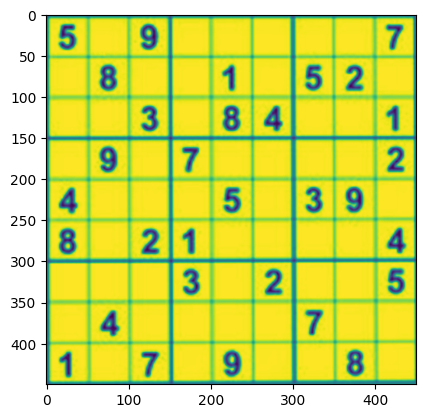

In [ ]:
#For compairing
plt.figure()
plt.imshow(su_imagewrap)
plt.show()

In [ ]:
# This function finds the next empty box (cell) in the Sudoku puzzle to be solved.
def nxt_box(quiz):
    for row in range(9):  # Iterate through each row
        for col in range(9):  # Iterate through each column
            if quiz[row][col] == 0:  # Check if the cell is empty (0 indicates an empty cell)
                return (row, col)  # Return the coordinates of the empty cell
    return False  # Return False if no empty cells are found, indicating the puzzle is solved or unsolvable

# This function checks if a number (n) can be placed in a specified cell without breaking Sudoku rules.
def possible(quiz, row, col, n):
    # Check the row: If n already exists in the same row, return False.
    for i in range(9):
        if quiz[row][i] == n and row != i:
            return False

    # Check the column: If n already exists in the same column, return False.
    for i in range(9):
        if quiz[i][col] == n and col != i:
            return False

    # Check the 3x3 subgrid: If n already exists in the same 3x3 grid, return False.
    row0 = row // 3  # Determine the starting row index of the 3x3 subgrid
    col0 = col // 3  # Determine the starting column index of the 3x3 subgrid
    for i in range(row0 * 3, row0 * 3 + 3):
        for j in range(col0 * 3, col0 * 3 + 3):
            if quiz[i][j] == n and (i, j) != (row, col):
                return False
    return True  # Return True if n can be placed in the cell without breaking any rules

# Recursive function to solve the Sudoku puzzle using backtracking.
def solve(quiz):
    val = nxt_box(quiz)  # Find the next empty cell
    if val is False:
        return True  # Return True if there are no more empty cells (puzzle solved)
    else:
        row, col = val  # Get the coordinates of the empty cell
        for n in range(1, 10):  # Iterate through numbers 1 to 9
            if possible(quiz, row, col, n):  # Check if the number can be placed in the cell
                quiz[row][col] = n  # Place the number in the cell
                if solve(quiz):  # Recursively attempt to solve the rest of the puzzle
                    return True  # Return True if the puzzle is solved
                quiz[row][col] = 0  # Reset the cell to empty (0) if placing n doesn't lead to a solution
        return False  # Return False if no valid number can be placed in the cell


# Function to print the solved Sudoku puzzle in a readable format.
def Solved(quiz):
    for row in range(9):  # Iterate through each row
        if row % 3 == 0 and row != 0:
            print("....................")  # Print a separator line every 3 rows for readability
        for col in range(9):  # Iterate through each column
            if col % 3 == 0 and col != 0:
                print("|", end=" ")  # Print a vertical separator every 3 columns
            if col == 8:
                print(quiz[row][col])  # Print the last number in the row and move to the next line
            else:
                print(str(quiz[row][col]) + " ", end="")  # Print the number with a space, stay on the same line


In [ ]:
solve(grid)

True

In [ ]:
if solve(grid):
    Solved(grid)
else:
    print("Solution don't exist. Model misread digits.")

5 1 9 | 5 2 3 | 4 6 7
6 8 4 | 7 1 9 | 5 2 8
7 2 3 | 6 8 4 | 9 1 3
....................
1 9 3 | 7 4 6 | 8 5 2
4 7 6 | 2 5 8 | 3 9 1
8 5 2 | 9 3 1 | 6 7 4
....................
9 6 8 | 3 7 2 | 1 4 5
2 4 1 | 8 6 5 | 7 3 9
5 3 7 | 4 9 1 | 2 8 6


In [ ]:
#model.save("AI_PROJECT_Sudoku.h5")
#model.save("AI_PROJECT_Sudoku")  # The "AI_PROJECT_Sudoku" directory will be created

In [ ]:
# Load the previously saved model
#from tensorflow.keras.models import load_model
# model = load_model("AI_PROJECT_Sudoku.h5")


# code to test images

In [ ]:
pwd

'/content/drive/MyDrive/Ai_Sudoku'

In [ ]:
# function used in the code, run for every secession
def main_box(contour):
    biggest = np.array([])
    max_area = 0
    for i in contour:
        area = cv2.contourArea(i)
        if area >50:
            peri = cv2.arcLength(i, True)
            approx = cv2.approxPolyDP(i , 0.02* peri, True)
            if area > max_area and len(approx) ==4:
                biggest = approx
                max_area = area
    return biggest ,max_area

def reframe(points):
    points = points.reshape((4, 2))
    points_new = np.zeros((4,1,2),dtype = np.int32)
    add = points.sum(1)
    points_new[0] = points[np.argmin(add)]
    points_new[3] = points[np.argmax(add)]
    diff = np.diff(points, axis =1)
    points_new[1] = points[np.argmin(diff)]
    points_new[2] = points[np.argmax(diff)]
    return points_new

def splitcells(neural_img):
    rows = np.vsplit(neural_img,9)
    boxes = []
    for r in rows:
        cols = np.hsplit(r,9)
        for box in cols:
            boxes.append(box)
    return boxes

def CropCell(cells):
    Cells_croped = []
    for image in cells:

        neural_img = np.array(image)
        neural_img = neural_img[4:46, 6:46]
        neural_img = Image.fromarray(neural_img)
        Cells_croped.append(neural_img)

    return Cells_croped


import cv2
import numpy as np

def read_cells(cell, model, threshold=0.65):
    result = []
    processed_images = []

    for image in cell:
        neural_img = np.asarray(image)
        neural_img = neural_img[4:neural_img.shape[0] - 4, 4:neural_img.shape[1] - 4]
        neural_img = cv2.resize(neural_img, (32, 32))
        neural_img = neural_img / 255
        processed_images.append(neural_img)

    processed_images = np.array(processed_images)
    predictions = model.predict(processed_images)

    for prediction in predictions:
        classIndex = np.argmax(prediction)
        probabilityValue = np.max(prediction)

        if probabilityValue > threshold:
            result.append(classIndex)
        else:
            result.append(0)

    return result

#This function finds the next box to solve

def nxt_box(quiz):
    for row in range(9):
        for col in range(9):
            if quiz[row][col] == 0:
                return (row, col)
    return False

#Function to fill in the possible values by evaluating rows collumns and smaller cells

def possible (quiz,row, col, n):
    #global quiz
    for i in range (0,9):
        if quiz[row][i] == n and row != i:
            return False
    for i in range (0,9):
        if quiz[i][col] == n and col != i:
            return False

    row0 = (row)//3
    col0 = (col)//3
    for i in range(row0*3, row0*3 + 3):
        for j in range(col0*3, col0*3 + 3):
            if quiz[i][j]==n and (i,j) != (row, col):
                return False
    return True

#Recursion function to loop over untill a valid answer is found.

def solve(quiz):
    val = nxt_box(quiz)
    if val is False:
        return True
    else:
        row, col = val
        for n in range(1,10): #n is the possible solution
            if possible(quiz,row, col, n):
                quiz[row][col]=n
                if solve(quiz):
                    return True
                else:
                    quiz[row][col]=0
        return

def Solved(quiz):
    for row in range(9):
        if row % 3 == 0 and row != 0:
            print("....................")

        for col in range(9):
            if col % 3 == 0 and col != 0:
                print("|", end=" ")

            if col == 8:
                print(quiz[row][col])
            else:
                print(str(quiz[row][col]) + " ", end="")

from tensorflow.keras.models import load_model
model = load_model("AI_PROJECT_Sudoku.h5")


 Test image



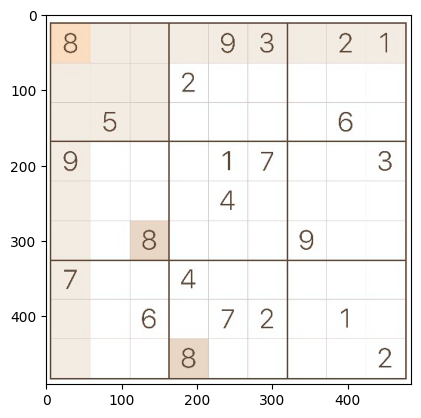


 Sudoku puzzel to slove



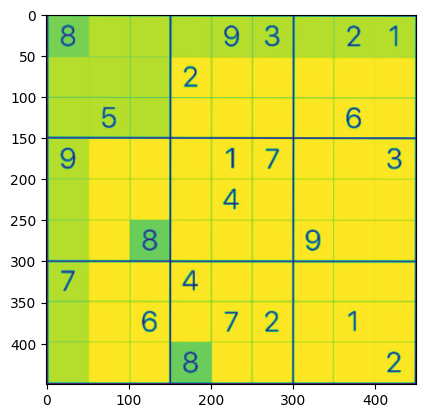

3/3 [==============================] - 0s 6ms/step
[[8 0 0 0 9 3 0 2 1]
 [0 0 0 2 0 0 0 0 0]
 [0 5 0 0 0 0 0 6 0]
 [9 0 0 0 1 7 0 0 3]
 [0 0 0 0 4 0 0 0 0]
 [0 0 8 0 0 0 9 0 0]
 [7 0 0 4 0 0 0 0 0]
 [0 0 6 0 7 2 0 1 0]
 [0 0 0 8 0 0 0 0 2]]


In [ ]:
# Importing puzzle to be solved
puzzle = cv2.imread("/content/drive/MyDrive/Ai_Sudoku/master.jpg")
print("\n Test image\n")
plt.figure()
plt.imshow(puzzle)
plt.show()


# Resizing puzzle to be solved
puzzle = cv2.resize(puzzle, (450,450))


#Preprocessing image to be read
sudoku_puzzle = cv2.resize(puzzle, (450,450))

# function to greyscale, blur and change the receptive su_puzzle of image
def preprocess(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray, (3,3),6)
    #blur = cv2.bilateralFilter(gray,9,75,75)
    su_puzzle_img = cv2.adaptiveThreshold(blur,255,1,1,11,2)
    return su_puzzle_img

# Preprocessing Puzzle
su_puzzle = preprocess(puzzle)

# print("print pre-processed test image ")
# plt.figure()
# plt.imshow(su_puzzle)
# plt.show()
# Finding the outline of the sudoku puzzle in the image
su_contour_1= su_puzzle.copy()
su_contour_2= sudoku_puzzle.copy()
su_contour, hierarchy = cv2.findContours(su_puzzle,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(su_contour_1, su_contour,-1,(0,255,0),3)

black_img = np.zeros((450,450,3), np.uint8)
su_biggest, su_maxArea = main_box(su_contour)
if su_biggest.size != 0:
    su_biggest = reframe(su_biggest)
    cv2.drawContours(su_contour_2,su_biggest,-1, (0,255,0),10)
    su_pts1 = np.float32(su_biggest)
    su_pts2 = np.float32([[0,0],[450,0],[0,450],[450,450]])
    su_matrix = cv2.getPerspectiveTransform(su_pts1,su_pts2)
    su_imagewrap = cv2.warpPerspective(puzzle,su_matrix,(450,450))
    su_imagewrap =cv2.cvtColor(su_imagewrap, cv2.COLOR_BGR2GRAY)
print("\n Sudoku puzzel to slove\n")
plt.figure()
plt.imshow(su_imagewrap)
plt.show()


sudoku_cell = splitcells(su_imagewrap)

sudoku_cell_croped= CropCell(sudoku_cell)

grid = read_cells(sudoku_cell_croped, model)
grid = np.asarray(grid)
grid = np.reshape(grid,(9,9))
print(grid)
# solve(grid)

# if solve(grid):
#     print("\n Puzzel solved \n")
#     Solved(grid)
# else:
#     print("Solution don't exist. Model misread digits.")

# code for solving Sudoku

In [ ]:
import numpy as np
import math
import copy
import random

# Convert the numpy array to a list for the solver
testSud =np.array(grid.tolist())

#Array of starting cells for each Sudoku subgrid
subGridPos = np.array([[[0,0],[0,3],[0,6]],
                       [[3,0],[3,3],[3,6]],
                       [[6,0],[6,3],[6,6]]])





#Function that returns proper subgrid given row/col values
def correctSubGrid(rowPos, colPos):
    if (rowPos < 3):
        if(colPos<3):
            return subGridPos[0,0]
        elif(colPos < 6):
            return subGridPos[0,1]
        else:
            return subGridPos[0,2]
    elif(rowPos < 6):
        if(colPos<3):
            return subGridPos[1,0]
        elif(colPos < 6):
            return subGridPos[1,1]
        else:
            return subGridPos[1,2]
    else:
        if(colPos<3):
            return subGridPos[2,0]
        elif(colPos < 6):
            return subGridPos[2,1]
        else:
            return subGridPos[2,2]
#Find size of sudoku and subgrid for that sudoku
#In the future, I also wanted to change the code to work for 2x2 or 4x4 Sudoku
#Parameterizing these values based upon the given grid is the first step of doing it.
sudSize = len(testSud)#Sudoku
subRange = int(math.sqrt(sudSize))#Subgrid


####################################################
#Utility functions
#Combine two vectors, ignoring similar elements (effectively unioning)
def combineTwoVectors(vec1, vec2):
    returnVec = vec1
    for i in vec2:
        if(i not in returnVec):
            returnVec.append(i)
    return returnVec

#Combine multiple vectors
def combineVectors(vectorVec):
    i = 0
    returnVec = vectorVec[0]
    while(i<len(vectorVec)-1):
        returnVec = combineTwoVectors(returnVec, vectorVec[i+1])
        i=i+1
    return np.sort(returnVec)


#Find all constraints for cell [i,j] of the matrix
#Returns a list of all values that can't be there
def totalC(i, j, matrix):
    currentRow = rowValues(i, matrix)
    currentCol = colValues(j, matrix)
    currentSGrid = valuesInSubGrid(correctSubGrid(i,j),matrix)
    return combineVectors([currentRow, currentCol, currentSGrid])
#Remove from mainVec all the elements of removeVec
def removeItems(mainVec, removeVec):
    returnVec = mainVec
    for i in removeVec:
        try:
            returnVec.remove(i)
        except:
            pass
    return returnVec

#Count the number of empty cells in a matrix
def countZeros(matrix):
    i = 0
    totalCount=0
    while(i < len(matrix)):
        j=0
        while(j<len(matrix)):
            if(matrix[i,j] == 0):
                totalCount = totalCount+1
            j=j+1
        i=i+1
    return totalCount

#Return all of the possible values that a cell could have
def getValid(matrix, i,j):
    totalCon = totalC(i,j, matrix)
    possValues = list(range(1,sudSize+1))
    return removeItems(possValues, totalCon)
########################################
#Find all values functions
#Return all the values in a row
def rowValues(rowPos, matrixSud):
    returnValues = []
    for i in range(sudSize):
        if (matrixSud[rowPos, i] not in returnValues):
            returnValues.append(matrixSud[rowPos,i])
    return returnValues

#Return all the the values in a column
def colValues(colPos, matrixSud):
    returnValues = []
    for i in range(sudSize):
        if (matrixSud[i, colPos] not in returnValues):
            returnValues.append(matrixSud[i,colPos])
    return returnValues



#Find the values in a subgrid
def valuesInSubGrid(pos, matrixSud):
    returnValues = []
    for i in range(subRange):
        for j in range(subRange):
            if(matrixSud[pos[0]+i,pos[1]+j] not in returnValues):
                returnValues.append(matrixSud[pos[0]+i,pos[1]+j])
    return returnValues


#Return a sugrid given a matrix and its position
def return3by3(matrix, pos):
    startRow = pos[0]
    startCol = pos[1]
    endRow = startRow+3
    endCol = startCol+3
    return matrix[startRow:endRow, startCol:endCol]


#############################################
#Solve simple Sudoku/check if Sudoku is valid functions

#Check if a subgrid has two of the same numbers
def checkGrid(matrix, subPos):
    #Generates 3x3 subgrid
    subGrid = matrix[subPos[0]:subPos[0]+subRange, subPos[1]:subPos[1]+subRange]
    possMatrix = []
    for i in range(subRange):
        for j in range(subRange):
            if(subGrid[i,j] != 0):
                if(subGrid[i,j] in possMatrix):
                    print("Two same numbers in a subgrid")
                    return 0
                possMatrix.append(subGrid[i,j])
    return 1


#Check all of the subgrids in the Sudoku
def checkFullGrid(matrix):
    for i2 in range(subRange):
        for j2 in range(subRange):
            if(checkGrid(matrix, subGridPos[i2,j2])==0):
                return 0
    return 1



#Checks if there is a single valid number that can be placed in a subgrid
#If so, it places it there
def subGridConstraint(matrix, pos):
    xPos= pos[0]
    yPos= pos[1]
    rangeX = list(range(xPos,xPos+3))
    rangeY = list(range(yPos,yPos+3))
    testMatrix = np.zeros((3,3))
    for i in rangeX:
        for j in rangeY:
            smallI = i - xPos
            smallJ = j - yPos
            if(matrix[i,j] !=0): #Initalize for count later on
                testMatrix[smallI, smallJ]=2
    maxCount = countZeros(testMatrix) #Count the empty cells in a subgrid
    optionValues= list(range(sudSize+1))
    baseValues = removeItems(optionValues, valuesInSubGrid(pos, matrix))
    currentPossiblePos = 0
    currentPossible = 0
    for possible in baseValues:
        currentCount = 0
        for i in rangeX:
            for j in rangeY:
                if(matrix[i,j] == 0):
                    currentRow = rowValues(i, matrix)
                    currentCol = colValues(j, matrix)
                    totalCon = combineTwoVectors(currentRow, currentCol)
                    if(possible not in totalCon):  #If the value is not restricted, try adding it
                        currentCount = currentCount+1
                        currentPossiblePos = [i,j]
                        currentPossible = possible
        if(currentCount == 0 and maxCount !=0): #Return 0 if the possible values is zero
            return 0
        if(currentCount == 1): #If there is only one possible value for a cell in a subgrid to take,
            matrix[currentPossiblePos[0], currentPossiblePos[1]]=currentPossible #add value
    return 1


#Solve sudoku on the global matrix
#Perform one constraint run
#If there is only one possible value that can be placed in a subgrid, row, or column,
#this function will place it there.
#At the same time, it will also return a 0 if the matrix can't be solved (same number in a row, column or subgrid)
#It will return a 1 if it found no contradictions
def oneRun(matrix):
    for i in range(subRange):
        for j in range(subRange):
            solvable =subGridConstraint(matrix, subGridPos[i,j])
            #print(solvable)
            if(solvable != 1 or checkFullGrid(testSud)==0):
                return 0

    for i in range(sudSize):
        for j in range(sudSize):
            if(matrix[i,j] == 0):
                currentRow = rowValues(i, matrix)
                currentCol = colValues(j, matrix)
                #if(currentRow)
                currentSGrid = valuesInSubGrid(correctSubGrid(i,j),matrix)
                totalCon = combineVectors([currentRow, currentCol, currentSGrid])
                if(sudSize+1 - len(totalCon) ==1):
                    optionVec = list(range(sudSize+1))
                    returnItem = removeItems(optionVec, totalCon)
                    matrix[i,j] = returnItem[0]
                if(sudSize+1 - len(totalCon)==0):
                    return 0
    return 1



#Runs oneRun several times
#For simple Sudoku, this is all that is needed to solve the Sudoku
#A return of 1 represents that the matrix can be solved, but might not be able to be solved
#with oneRun alone
def runSet(matrix):
    i = 0
    while i < 10:
        successful = oneRun(matrix)
        if(successful == 0):
            #print("This sudoku has no solution")
            return 0
        i=i+1
    return 1


#####################################################
#Consistentcy functions
#Check a subgrid for consitency
def checkSubGrid(subPos, matrix):
    subGrid = matrix[subPos[0]:subPos[0]+subRange, subPos[1]:subPos[1]+subRange]
    baseX = subPos[0]
    baseY = subPos[1]
    possibleVec = []
    otherPos = []
    for i in range(subRange):
        for j in range(subRange):
            #Move along the subgrid
            currX = baseX+i
            currY=baseY+j
            if(matrix[currX,currY]==0):
                totalCon = totalC(currX,currY, matrix)
                totalPos = list(range(sudSize+1))
                possValues = removeItems(totalPos,totalCon)
                possibleVec.append(possValues) #Keep track of the possible values for each cell
            else:
                otherPos.append(matrix[currX,currY]) #Keep track of numbers already in subgrid,
    numCount = [0]*sudSize
    #For each number, count the possible cells that could have that number
    for num in range(1,sudSize+1):
        for i in possibleVec:
            if (num in i):
                numCount[num-1] = numCount[num-1]+1
    for i in otherPos: #Make sure the values already in the subgrid are accounted for
        numCount[int(i)-1] = 1

    #If a 0 is in numCount, there exists a value 1-9 that can't be placed in
    #the subgrid, violating inconsistancy
    if(0 in numCount):
        return False
    return True

#Check consitentcy for columns
#For a column
def checkCol(matrix, colNum):
    countVector = [0]*sudSize
    for i in range(sudSize):
        if(matrix[i,colNum]==0):
            valid=getValid(matrix, i, colNum)
            for v in valid:
                countVector[int(v)-1]=countVector[int(v)-1]+1
        else:
            countVector[int(matrix[i,colNum])-1]=1
    if(0 in countVector):
        return False
    return True

#For all columns
def checkAllCol(matrix):
    for i in range(sudSize):
        if(not checkCol(matrix,i)):
            return False
    return True

#Check consistentcy for a row
def checkRow(matrix, rowNum):
    countVector = [0]*sudSize
    for i in range(sudSize):
        if(matrix[rowNum, i]==0):
            valid=getValid(matrix, rowNum, i)
            for v in valid:
                countVector[int(v)-1]=countVector[int(v)-1]+1
        else:
            countVector[int(matrix[rowNum, i])-1]=1
    if(0 in countVector):
        return False
    return True
#For all rows
def checkAllRow(matrix):
    for i in range(sudSize):
        if(not checkRow(matrix,i)):
            return False
    return True



#Combine consistency checking for all rows, columns, and subgrids
def checkCon2(matrix):
    #Check consistency for subgrids

    for i in range(subRange):
        for j in range(subRange):
            sGrid = checkSubGrid(subGridPos[i,j], matrix)
            if(sGrid ==False):
                return False
    #Check consistency of rows and columns
    if(checkAllCol(matrix)):
        if(checkAllRow(matrix)):
            return True
    return False

#Other functions
#Count the amount of cells that can be impacted by the given cell
def countZerosPos(matrix, x, y):
    totalCount = 0
    for i in range(sudSize):
        if(i !=x and matrix[i, y]==0):
            totalCount = totalCount+1
    for j in range(sudSize):
        if(j !=y and matrix[x, j]==0):
            totalCount = totalCount+1
    return totalCount

#Find the most constraining cell, or the cell that impacts the
#other cells the most for a given matrix
def mostConstraining(matrix):
    mostConPos = []
    maxCount = 0
    for i in range(sudSize):
        for j in range(sudSize):
            maxC = countZerosPos(matrix, i, j)
            if(maxC > maxCount and matrix[i,j] ==0):
                maxCount = maxC
                mostConPos = [i,j]
    return mostConPos

#Select the most constrained cell (not used in the current code, but can be)
def mostConstrained(matrix):
    mostConPos = []
    minPoss = sudSize+2
    for i in range(sudSize):
        for j in range(sudSize):
            if(matrix[i,j]==0):
                totalPoss = getValid(matrix,i,j)
                if (len(totalPoss)<minPoss):
                    minPoss = len(totalPoss)
                    mostConPos = [i,j]
    return mostConPos

#Checks of the matrix has an empty cell.
def zeroIn(matrix):
    for i in range(sudSize):
        for j in range(sudSize):
            if(matrix[i,j]==0):
                return True
    return False




#####################################
#Fully Solve Sudoku

#Solve Sudoku recursively.
#Failure is represented by np.zeros((2,2))
def solve(gridS):
    #If Sudoku is not solvable, or a continuation is passed in for recurison
    #that is failure, return failure.
    if(gridS.shape == (2,2) or not runSet(gridS)):
        return np.zeros((2,2))
    #Find the position for the most constraining cell
    MCC = mostConstraining(gridS)
    #If mostConstraining above returns an empty set, there is no empty cell, so return the grid.
    if len(MCC)==0:
        return gridS
    [x,y]=MCC
    #Get all the possible values for the grid
    valid = getValid(gridS, x,y)
    for v in valid:
        #Send a copy of the grid with test value in for recursion
        testBoard = copy.deepcopy(gridS)
        testBoard[x][y] = v
        #If runset fails, or the matrix is not consitent, don't bother
        #moving further with this continuation
        if (runSet(gridS)==0 or not checkCon2(gridS)):
            continue
        #Find the next board recursively
        testBoard = solve(testBoard)
        if testBoard.shape != (2,2):
            return testBoard
    #If no legal values are possible, return failure
    return np.zeros((2,2))





#Print Sudoku board
def print_sudoku(board):
    for i in range(sudSize):
        if i % subRange == 0 and i != 0:
            print("-" * 21)
        for j in range(sudSize):
            if j % subRange == 0 and j != 0:
                print("|", end=" ")
            print(board[i][j], end=" ")
        print()

#Call solve on the given Sudoku
solvedMat = solve(testSud)
if(solvedMat.shape == (2,2)):
    print("Unsolvable Sudoku")
    print("Please check the numbers inputted.")
else:
    #After quite a few tests, I found one case where the return Sudoku was one move away from
    #solving (one zero left).  In this case, perform oneRun to fill in the last square
    oneRun(solvedMat)
    print_sudoku(solvedMat)


8 6 4 | 7 9 3 | 5 2 1 
1 7 9 | 2 5 6 | 8 3 4 
2 5 3 | 1 8 4 | 7 6 9 
---------------------
9 4 5 | 6 1 7 | 2 8 3 
3 2 7 | 9 4 8 | 1 5 6 
6 1 8 | 3 2 5 | 9 4 7 
---------------------
7 8 2 | 4 3 1 | 6 9 5 
4 9 6 | 5 7 2 | 3 1 8 
5 3 1 | 8 6 9 | 4 7 2 



 Test image



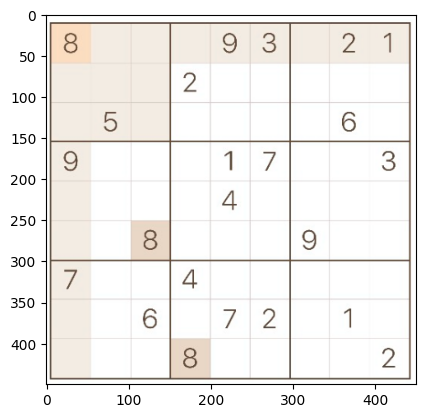


Extracted Sudoku Puzzel From An image

[[8 0 0 0 9 3 0 2 1]
 [0 0 0 2 0 0 0 0 0]
 [0 5 0 0 0 0 0 6 0]
 [9 0 0 0 1 7 0 0 3]
 [0 0 0 0 4 0 0 0 0]
 [0 0 8 0 0 0 9 0 0]
 [7 0 0 4 0 0 0 0 0]
 [0 0 6 0 7 2 0 1 0]
 [0 0 0 8 0 0 0 0 2]]

 Sudoku Puzzel

8 6 4 | 7 9 3 | 5 2 1 
1 7 9 | 2 5 6 | 8 3 4 
2 5 3 | 1 8 4 | 7 6 9 
---------------------
9 4 5 | 6 1 7 | 2 8 3 
3 2 7 | 9 4 8 | 1 5 6 
6 1 8 | 3 2 5 | 9 4 7 
---------------------
7 8 2 | 4 3 1 | 6 9 5 
4 9 6 | 5 7 2 | 3 1 8 
5 3 1 | 8 6 9 | 4 7 2 


In [ ]:
# Sudoku Completed solution


print("\n Test image\n")
plt.figure()
plt.imshow(puzzle)
plt.show()

print("\nExtracted Sudoku Puzzel From An image\n")
print(grid)

print("\n Sudoku Puzzel\n")
print_sudoku(solvedMat)

## THANK YOU